Text(0.5, 1.0, '$V^T$')

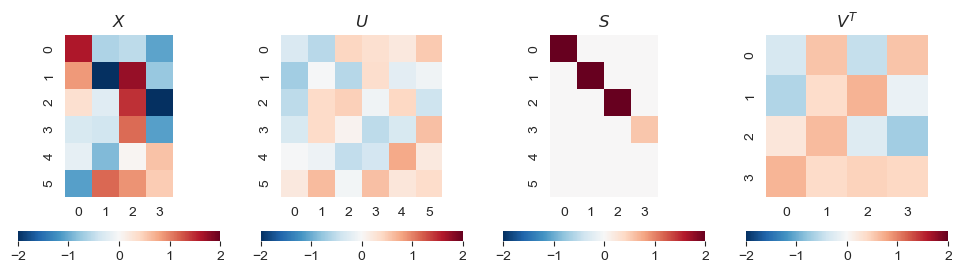

In [1]:
# Bk4_Ch16_01.py

# Bk4_Ch16_01_A

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

PRECISION = 3


def svd(X, full_matrices):
    # 奇异值分解
    U, s, Vt = np.linalg.svd(X, full_matrices=full_matrices)
    
    # Put the vector singular values into a padded matrix
    
    if full_matrices:
        S = np.zeros(X.shape)
        # np.fill_diagonal 函数将向量 s 的元素填充到对角线
        np.fill_diagonal(S, s)
    else:
        # 创建对角矩阵
        S = np.diag(s)
    
    # Rounding for display
    return np.round(U, PRECISION), np.round(S, PRECISION), np.round(Vt.T, PRECISION)


# Repeatability
np.random.seed(1)

# Generate random matrix
X = np.random.randn(6, 4)

# manipulate X and reduce rank to 3
# X[:,3] = X[:,0] + X[:,1]
all_max = 2;
all_min = -2
# 奇异值分解
U, S, V = svd(X, full_matrices=True)

fig, axs = plt.subplots(1, 4, figsize=(12, 3))

plt.sca(axs[0])
ax = sns.heatmap(X, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$X$')

plt.sca(axs[1])
ax = sns.heatmap(U, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$U$')

plt.sca(axs[2])
ax = sns.heatmap(S, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$S$')

plt.sca(axs[3])
ax = sns.heatmap(V.T, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$V^T$')


Text(0.5, 1.0, '$V^T$')

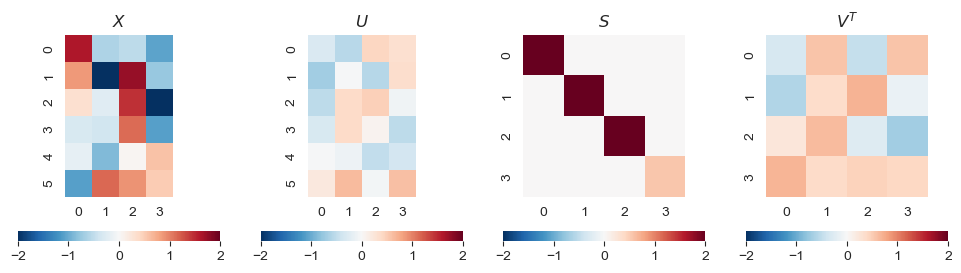

In [2]:
# Bk4_Ch16_01_B

# 奇异值分解
U, S, V = svd(X, full_matrices=False)

fig, axs = plt.subplots(1, 4, figsize=(12, 3))

plt.sca(axs[0])
ax = sns.heatmap(X, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$X$')

plt.sca(axs[1])
ax = sns.heatmap(U, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$U$')

plt.sca(axs[2])
ax = sns.heatmap(S, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$S$')

plt.sca(axs[3])
ax = sns.heatmap(V.T, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$V^T$')


Text(0.5, 1.0, '$V^T$')

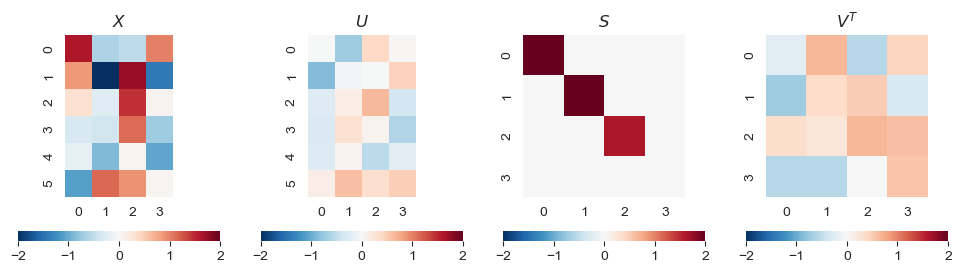

In [3]:
# Bk4_Ch16_01_C

import copy

X_rank_3 = copy.deepcopy(X);
# manipulate X and reduce rank to 3
X_rank_3[:, 3] = X[:, 0] + X[:, 1]

U_rank_3, S_rank_3, V_rank_3 = svd(X_rank_3, full_matrices=False)

fig, axs = plt.subplots(1, 4, figsize=(12, 3))

plt.sca(axs[0])
ax = sns.heatmap(X_rank_3, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$X$')

plt.sca(axs[1])
ax = sns.heatmap(U_rank_3, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$U$')

plt.sca(axs[2])
ax = sns.heatmap(S_rank_3, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$S$')

plt.sca(axs[3])
ax = sns.heatmap(V_rank_3.T, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$V^T$')


Text(0.5, 1.0, '$E = X - \\hat{X}$')

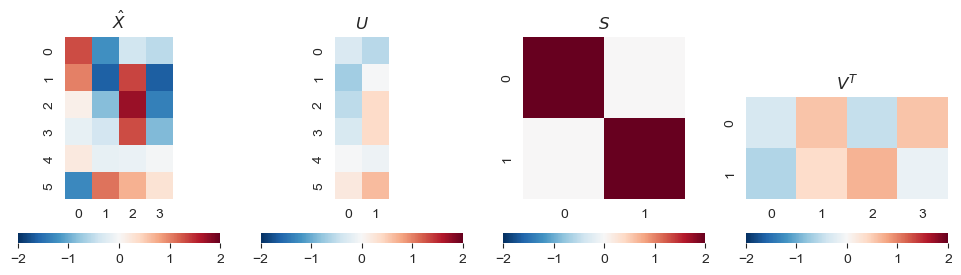

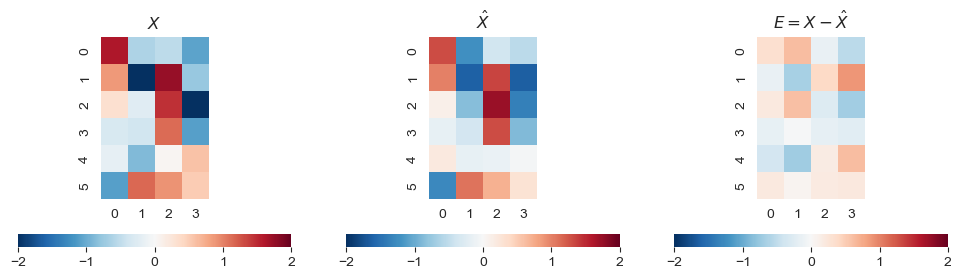

In [4]:
# Bk4_Ch16_01_D

num_p = 2;

U_truc = U[:, 0:num_p]

S_truc = S[0:num_p, 0:num_p]

V_truc = V[:, 0:num_p]

X_hat = U_truc @ S_truc @ (V_truc.T)

# reproduce
fig, axs = plt.subplots(1, 4, figsize=(12, 3))

plt.sca(axs[0])
ax = sns.heatmap(X_hat, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$\hat{X}$')

plt.sca(axs[1])
ax = sns.heatmap(U_truc, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$U$')

plt.sca(axs[2])
ax = sns.heatmap(S_truc, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$S$')

plt.sca(axs[3])
ax = sns.heatmap(V_truc.T, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$V^T$')

# Error
# 绘制误差
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

plt.sca(axs[0])
ax = sns.heatmap(X, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$X$')

plt.sca(axs[1])
ax = sns.heatmap(X_hat, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$\hat{X}$')

plt.sca(axs[2])
ax = sns.heatmap(X - X_hat, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$E = X - \hat{X}$')


Text(0.5, 1.0, '$\\hat{X}_4$')

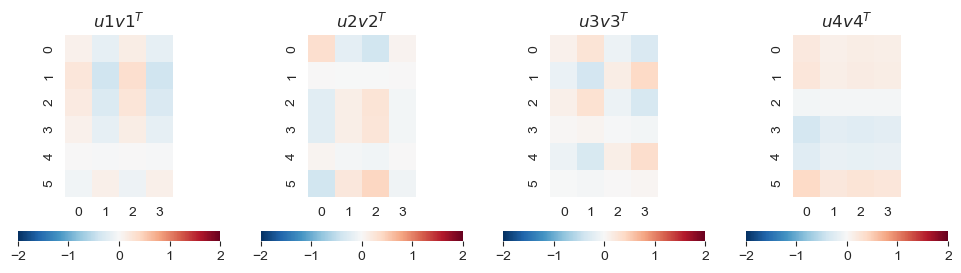

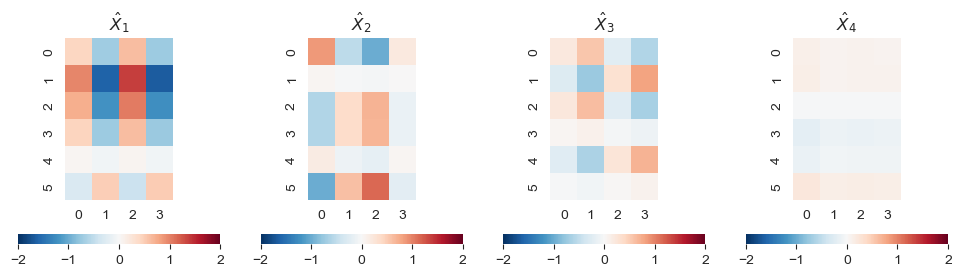

In [5]:
# Bk4_Ch16_01_E

# [:, None] 将一维数组转换为二维列向量
# np.outer() 函数计算两个输入数组的外积
u1_outer_v1 = np.outer(U[:, 0][:, None], V[:, 0][:, None]);

u2_outer_v2 = np.outer(U[:, 1][:, None], V[:, 1][:, None]);

u3_outer_v3 = np.outer(U[:, 2][:, None], V[:, 2][:, None]);

u4_outer_v4 = np.outer(U[:, 3][:, None], V[:, 3][:, None]);

# visualize tensor products

fig, axs = plt.subplots(1, 4, figsize=(12, 3))

plt.sca(axs[0])
ax = sns.heatmap(u1_outer_v1, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$u1v1^T$')

plt.sca(axs[1])
ax = sns.heatmap(u2_outer_v2, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$u2v2^T$')

plt.sca(axs[2])
ax = sns.heatmap(u3_outer_v3, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$u3v3^T$')

plt.sca(axs[3])
ax = sns.heatmap(u4_outer_v4, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$u4v4^T$')

X_1 = S[0, 0] * u1_outer_v1
# X_1 = S[0,0]*U[:,0][:, None]@V[:,0][None, :];
X_2 = S[1, 1] * u2_outer_v2
# X_2 = S[1,1]*U[:,1][:, None]@V[:,1][None, :];
X_3 = S[2, 2] * u3_outer_v3
# X_3 = S[2,2]*U[:,2][:, None]@V[:,2][None, :];
X_4 = S[3, 3] * u4_outer_v4
# X_4 = S[3,3]*U[:,3][:, None]@V[:,3][None, :];

# visualize components
fig, axs = plt.subplots(1, 4, figsize=(12, 3))

plt.sca(axs[0])
ax = sns.heatmap(X_1, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$\hat{X}_1$')

plt.sca(axs[1])
ax = sns.heatmap(X_2, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$\hat{X}_2$')

plt.sca(axs[2])
ax = sns.heatmap(X_3, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$\hat{X}_3$')

plt.sca(axs[3])
ax = sns.heatmap(X_4, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$\hat{X}_4$')


Text(0.5, 1.0, '$X - (\\hat{X}_1 + \\hat{X}_2 + \\hat{X}_3)$')

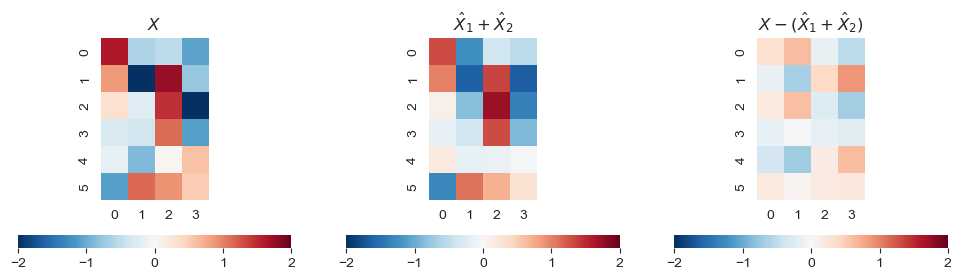

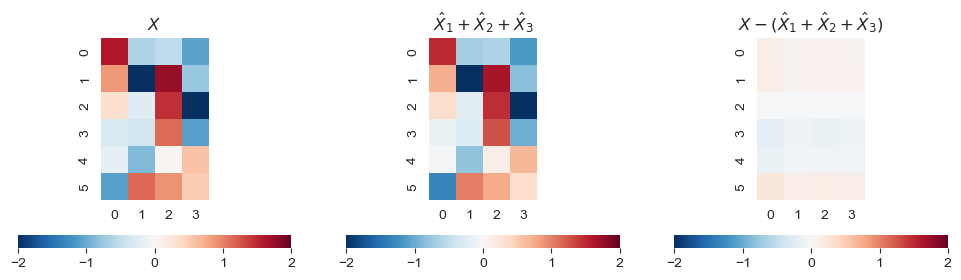

In [6]:
# Bk4_Ch16_01_F

fig, axs = plt.subplots(1, 3, figsize=(12, 3))

plt.sca(axs[0])
ax = sns.heatmap(X, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$X$')

plt.sca(axs[1])
ax = sns.heatmap(X_1 + X_2, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$\hat{X}_1 + \hat{X}_2$')

plt.sca(axs[2])
ax = sns.heatmap(X - (X_1 + X_2), cmap='RdBu_r', vmax=all_max, vmin=all_min,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$X - (\hat{X}_1 + \hat{X}_2)$')

fig, axs = plt.subplots(1, 3, figsize=(12, 3))

plt.sca(axs[0])
ax = sns.heatmap(X, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$X$')

plt.sca(axs[1])
ax = sns.heatmap(X_1 + X_2 + X_3, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$\hat{X}_1 + \hat{X}_2 + \hat{X}_3$')

plt.sca(axs[2])
ax = sns.heatmap(X - (X_1 + X_2 + X_3), cmap='RdBu_r', vmax=all_max, vmin=all_min,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$X - (\hat{X}_1 + \hat{X}_2 + \hat{X}_3)$')